In [1]:
import pandas as pd

from notebooks.analytics.utils import init_analysis



In [2]:

fs = init_analysis("daeclust_07_01-clusters")

In [3]:
start_time = fs["start_time"].min()

In [4]:
start_time

1674145821886

In [5]:
fs.groupby(["round_id", "trainer_id"])["trainer_id"].count().groupby("round_id").median().mean()

4.828431372549019

In [6]:
fs_rounds_time_start = fs.groupby("round_id")["start_time"].min()

In [7]:
fs_round_minutes = (fs_rounds_time_start - start_time) / (1000 * 60)

In [8]:
EXP_NAME = "daeclust_07_01-clusters-selection"
fs_test = init_analysis("daeclust_07_01-clusters-selection")
fs_means = fs_test.groupby(["round_id", "trainer_id"])["test_acc"].max().groupby(["round_id"]).mean().reset_index()

In [9]:
fs_acc_time = fs_means.merge(fs_round_minutes.reset_index(), on=["round_id"])

In [10]:
fed = init_analysis("fed_avg_02")

start_time = fed["start_time"].min()
fed_rounds_time_start = fed.groupby("round_id")["start_time"].min()
fed_round_minutes = (fed_rounds_time_start - start_time) / (1000 * 60)

fed_means = fed.groupby(["round_id"])["test_acc"].mean().reset_index()
fed_acc_time = fed_means.merge(fed_round_minutes.reset_index(), on=["round_id"])

In [ ]:
import pandas as pd

fed_acc_time["label"] = "FedAVG"
fs_acc_time["label"] = "MCFL"
df = pd.concat([fed_acc_time, fs_acc_time.loc[fs_acc_time.round_id < 50]], ignore_index=True)
df

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.lineplot(df, x="start_time", y="test_acc", hue="label")
plt.ylabel("Précision Moyenne")
plt.xlabel("Temps écoulé (min)")
plt.title("Précision moyenne des entraîneurs en fonction du temps écoulé")

plt.show()

In [ ]:
df.groupby("label")["start_time"].diff(periods=-1).iloc[100:105]

In [ ]:
declust_3 = init_analysis(f"daeclust_16-clusters-selection")
declust_3["label"] = "3 std"
declust_2 = init_analysis(f"daeclust_17_00-clusters-selection")
declust_2["label"] = "2 std"
declust_mix = init_analysis(f"daeclust_20_01-clusters")
declust_mix["label"] = "Mix of 1, 2, 3 std"
fed["label"] = "FedAVG"

all_selections = pd.concat([declust_3, declust_2, declust_mix, fed])

In [ ]:
training_start = all_selections.groupby(["label"])["start_time"].min()
round_start = all_selections.groupby(["round_id", "label"])["start_time"].min()

In [ ]:
round_times = (round_start - training_start)

In [ ]:
round_times

In [ ]:
times = round_times.reset_index().sort_values("round_id")

In [ ]:
times["times"] = times.groupby("label").diff(periods=-1)["start_time"] * -1
times

In [ ]:
times["ref"] = times.reset_index().groupby("round_id").min()["times"]

In [ ]:
times.head(20)

In [ ]:
sns.lineplot(times.loc[times.round_id > 0], x="round_id", y="times", hue="label")
plt.ylabel("Temps requis pour la ronde (ms)")
plt.xlabel("Ronde")
plt.title("Temps total pour chaque ronde d'entraînement")
plt.legend(loc=1)
plt.show()

In [23]:
df.groupby("label")["start_time"].diff(periods=-1).iloc[100:105]

100   -0.107217
101   -0.105500
102         NaN
103   -0.824917
104   -0.597633
Name: start_time, dtype: float64

In [118]:
declust_3 = init_analysis(f"daeclust_16-clusters-selection")
declust_3["label"] = "3 std"
declust_2 = init_analysis(f"daeclust_17_00-clusters-selection")
declust_2["label"] = "2 std"
declust_mix = init_analysis(f"daeclust_20_01-clusters")
declust_mix["label"] = "Mix of 1, 2, 3 std"
fed["label"] = "FedAVG"

all_selections = pd.concat([declust_3, declust_2, declust_mix, fed])

In [119]:
training_start = all_selections.groupby(["label"])["start_time"].min()
round_start = all_selections.groupby(["round_id", "label"])["start_time"].min()

In [120]:
round_times = (round_start - training_start)

In [121]:
round_times

round_id  label             
0.0       FedAVG                      0
          Mix of 1, 2, 3 std          0
1.0       2 std                       0
          3 std                       0
          FedAVG                   2004
                                 ...   
101.0     2 std                 6752045
          3 std                 1847382
          FedAVG                 680796
          Mix of 1, 2, 3 std    8292372
102.0     FedAVG                 687126
Name: start_time, Length: 407, dtype: int64

In [122]:
times = round_times.reset_index().sort_values("round_id")

In [145]:
times["times"] = times.groupby("label").diff(periods=-1)["start_time"] * -1
times

,round_id,label,start_time,times,times_factor
0,0.0,FedAVG,0,2004.0,1.000000
1,0.0,"Mix of 1, 2, 3 std",0,398547.0,11.611322
2,1.0,2 std,0,76042.0,12.608523
3,1.0,3 std,0,76302.0,9.068457
4,1.0,FedAVG,2004,34324.0,5.774563
...,...,...,...,...,...
404,101.0,FedAVG,680796,6330.0,NaN
405,101.0,"Mix of 1, 2, 3 std",8292372,NaN,NaN
402,101.0,2 std,6752045,NaN,NaN
403,101.0,3 std,1847382,NaN,NaN


In [156]:
times["ref"] = times.reset_index().groupby("round_id").min()["times"]

In [157]:
times.head(20)

,round_id,label,start_time,times,times_factor,ref
0,0.0,FedAVG,0,2004.0,1.000000,2004.0
1,0.0,"Mix of 1, 2, 3 std",0,398547.0,11.611322,34324.0
2,1.0,2 std,0,76042.0,12.608523,6031.0
3,1.0,3 std,0,76302.0,9.068457,8414.0
4,1.0,FedAVG,2004,34324.0,5.774563,5944.0
5,1.0,"Mix of 1, 2, 3 std",398547,77444.0,13.090602,5916.0
6,2.0,2 std,76042,61214.0,8.456140,7239.0
7,2.0,3 std,76302,43886.0,7.552229,5811.0
8,2.0,FedAVG,36328,6031.0,1.042163,5787.0
9,2.0,"Mix of 1, 2, 3 std",475991,60252.0,10.058765,5990.0


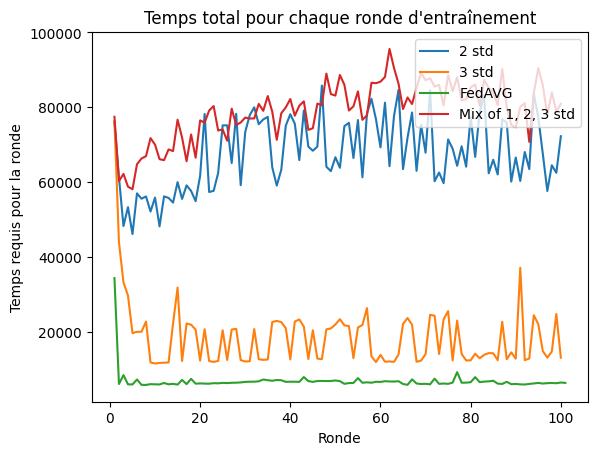

In [161]:
sns.lineplot(times.loc[times.round_id > 0], x="round_id", y="times", hue="label")
plt.ylabel("Temps requis pour la ronde (ms)")
plt.xlabel("Ronde")
plt.title("Temps total pour chaque ronde d'entraînement")
plt.legend(loc=1)
plt.show()